In [2]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import anndata as ad
import pooch 
import os
import scvelo as scv
import seaborn as sns


In [3]:
print ("Poochie")

Poochie


In [4]:
# First convert seurat data to anndata and read h5ad. The file I am reading is in my working directory
adata = sc.read_h5ad("Int.h5ad")
adata

AnnData object with n_obs × n_vars = 61596 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'group', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'sample', 'integrated_snn_res.0.5'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [8]:
## For some reason python recognizes seurat clusters and a continous variable. This is to change that
adata.obs['seurat_clusters'] = adata.obs['seurat_clusters'].astype(str)

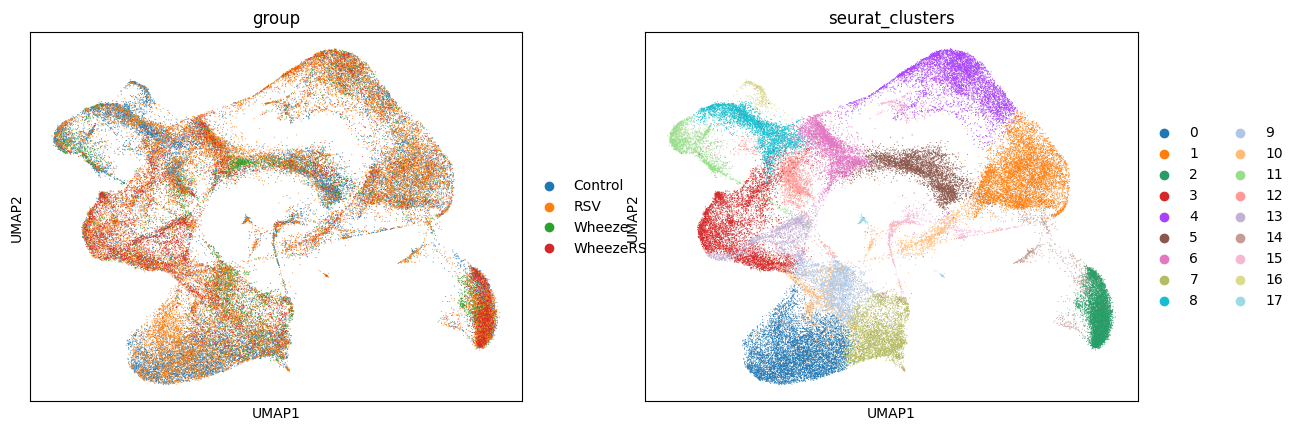

In [9]:
sc.pl.umap(
    adata, color = ['group', 'seurat_clusters' ], 
    # Setting a smaller point size to get prevent overlap
   use_raw=False 
)

In [11]:
## This is to make visulization easier as the default is to use raw variables. Otherwise you need to specify use.raw = False

adata.raw = adata

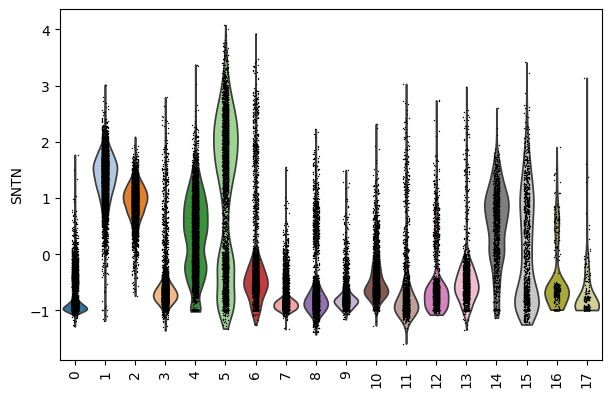

In [6]:
sc.pl.violin(adata, keys='SNTN', groupby='seurat_clusters', use_raw=False, palette='tab20', rotation=90)

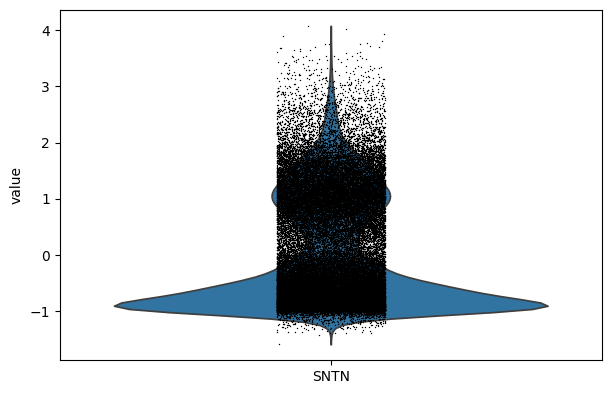

In [12]:
## Making sure everything works well and my data is in the right format
sc.pl.violin(adata, keys="SNTN")

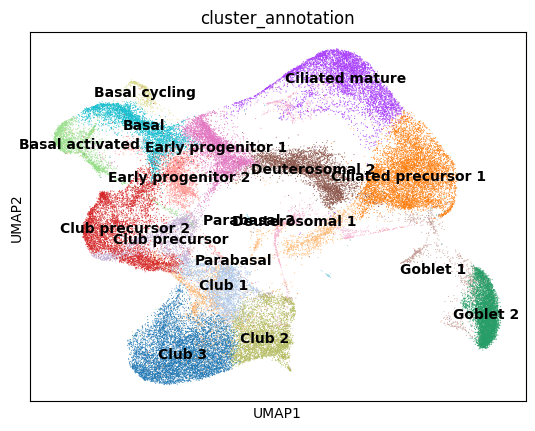

In [49]:
## Now we will rename the clusters and order them

# renaming clusters
adata.obs["cluster_annotation"] = adata.obs["seurat_clusters"].map(
    {
        
        "0": "Club 3",
        "1": "Ciliated precursor 1",
        "2": "Goblet 2",
        "3": "Club precursor 2",
        "4": "Ciliated mature",
        "5": "Deuterosomal 2",
        "6": "Early progenitor 1",
        "7": "Club 2",
        "8": "Basal",
        "9": "Club 1",
        "10": "Parabasal",
        "11": "Basal activated",
        "12": "Early progenitor 2",
        "13": "Club precursor",
        "14": "Goblet 1",
        "15": "Deuterosomal 1",
        "16": "Basal cycling",
        "17": "Parabasal 2",
        
 }
)



sc.pl.umap(adata, color=[ 'cluster_annotation'], wspace=0.5, use_raw=False, legend_loc= "on data")



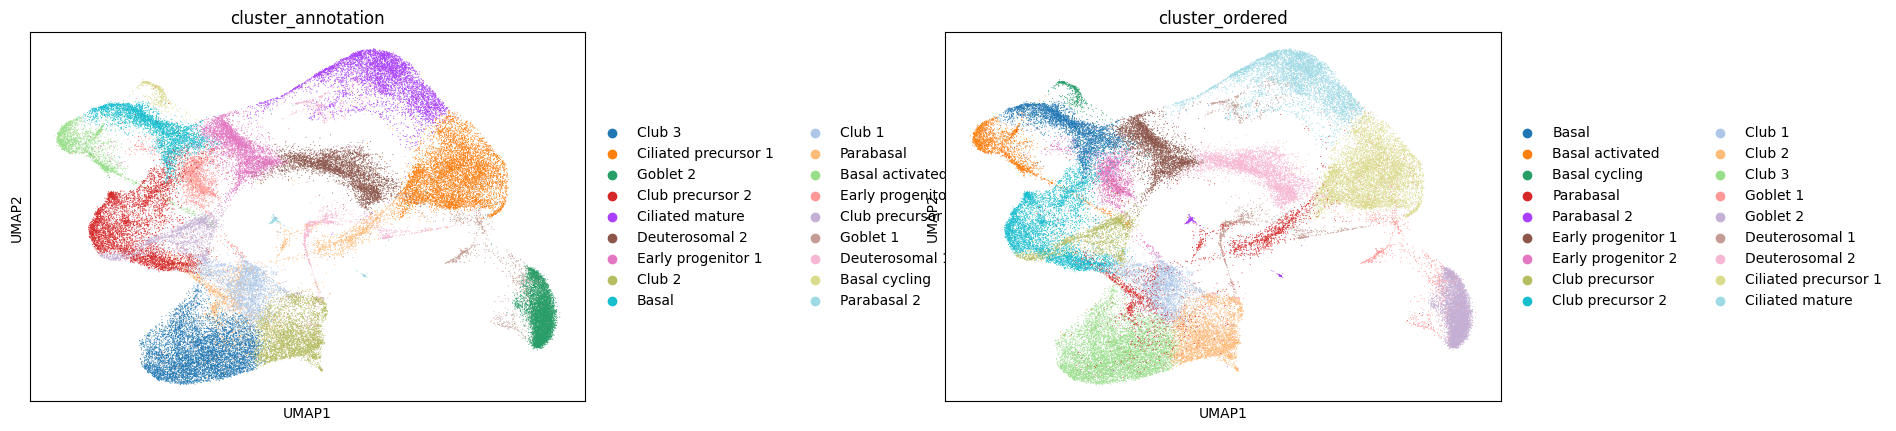

In [18]:
## Now I will order
cluster_annotation = ["Basal",
"Basal activated",
"Basal cycling",
"Parabasal",
"Parabasal 2",
"Early progenitor 1",
"Early progenitor 2",
"Club precursor",
"Club precursor 2",
"Club 1",
"Club 2",
"Club 3",
"Goblet 1",
"Goblet 2",
"Deuterosomal 1",
"Deuterosomal 2",
"Ciliated precursor 1",
"Ciliated mature" ]

adata.obs["cluster_ordered"] = pd.Categorical(
    values=adata.obs.cluster_annotation, categories=cluster_annotation, ordered=True
)

sc.pl.umap(adata, color=["cluster_annotation", "cluster_ordered"], wspace=0.5)

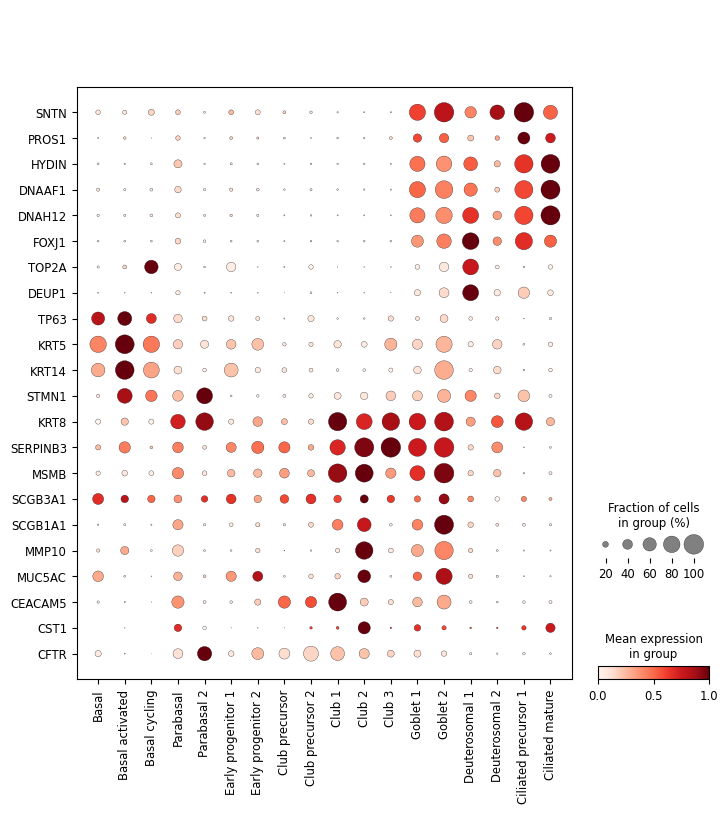

In [41]:
## Now to plot the dotplot

marker_genes = [
    *["SNTN", "PROS1", "HYDIN", "DNAAF1", "DNAH12", "FOXJ1", "TOP2A", "DEUP1", "TP63","KRT5", "KRT14", "STMN1", "KRT8", "SERPINB3", "MSMB", "SCGB3A1", "SCGB1A1", "MMP10", "MUC5AC", "CEACAM5", "CST1", "CFTR" ],
]

# Generate the dotplot

sc.pl.dotplot(adata, marker_genes, groupby="cluster_ordered", 
               standard_scale="var", swap_axes=True)

